I have recently studied the book: Python for Data Analysis by Wes McKinney and are gonna apply the knowledge aquired on this project. This would be a showcase of my technical as well as problem solving skills when working with large scale data. 

The goal for this project is to do a Exploratory Data Analysis(EDA) and focus on the industries and sectors that is 
peerforming better/worse than the market in the US (P/E, Forw. P/E)
- Sub goal is to filter sector and industry for further use in backtesting with TWS API

The data is exported from finviz.com (30-Aug-2021)
- data about the tickers (tickers.csv)
- data about the industries  (industry.csv)
- data about the sector (sectors.csv)
- benchmark(S&P 500) data is inputted manually in as a series as a reference later.

In [1]:
#import modules
import pandas as pd 
import numpy as np

In [2]:
#import data
tickers = pd.read_csv(r'C:/Users/omar_/OneDrive/Skrivebord/Python_Notes/Data_Frame_Project/ticker.csv',na_values=np.nan)
indus = pd.read_csv(r'C:/Users/omar_/OneDrive/Skrivebord/Python_Notes/Data_Frame_Project/industries.csv',na_values=np.nan)
sec = pd.read_csv(r'C:/Users/omar_/OneDrive/Skrivebord/Python_Notes/Data_Frame_Project/sector.csv',na_values=np.nan)

In [3]:
print(tickers.head())
print(indus.head())
print(sec.head())

   No. Ticker                          Company              Sector  \
0    1      A       Agilent Technologies, Inc.          Healthcare   
1    2     AA                Alcoa Corporation     Basic Materials   
2    3   AAAU  Goldman Sachs Physical Gold ETF           Financial   
3    4    AAC     Ares Acquisition Corporation           Financial   
4    5   AACG            ATA Creativity Global  Consumer Defensive   

                        Industry Country  Market Cap     P/E  Forward P/E  \
0         Diagnostics & Research     USA    52674.86   54.15        36.27   
1                       Aluminum     USA     7739.96   19.47         9.23   
2           Exchange Traded Fund     USA         NaN     NaN          NaN   
3                Shell Companies     USA     1209.98  100.00          NaN   
4  Education & Training Services   China       83.39     NaN          NaN   

    PEG  ...  Relative Strength Index (14)  Change from Open     Gap  \
0  1.02  ...                         89.96  

In [4]:
#info about the benchmark
info = {'Ticker' : 'SP500', 'P_E' : 25.05 , 'Fwd_P_E' : 19.98} #data taken from finviz.
bench = pd.Series(info)
bench.head()

Ticker     SP500
P_E        25.05
Fwd_P_E    19.98
dtype: object

In [5]:
# we can drop the "No." coulumn and filter the data for only focusing on the US Stocks.
tickers = tickers.drop(columns = 'No.')
tickers = tickers.loc[ tickers['Country'] == 'USA', : ]
tickers.head()

,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Forward P/E,PEG,P/S,...,Relative Strength Index (14),Change from Open,Gap,Analyst Recom,Average Volume,Relative Volume,Price,Volume,Target Price,IPO Date
0,A,"Agilent Technologies, Inc.",Healthcare,Diagnostics & Research,USA,52674.86,54.15,36.27,1.02,8.58,...,89.96,-0.13%,0.25%,1.9,1802.26,0.66,173.81,1182032.0,170.76,11/18/1999
1,AA,Alcoa Corporation,Basic Materials,Aluminum,USA,7739.96,19.47,9.23,NaN,0.74,...,60.20,4.35%,2.10%,2.2,7667.27,0.93,44.13,7105731.0,47.21,10/18/2016
2,AAAU,Goldman Sachs Physical Gold ETF,Financial,Exchange Traded Fund,USA,NaN,NaN,NaN,NaN,NaN,...,59.91,1.54%,-0.06%,NaN,320.13,0.81,18.09,258806.0,NaN,8/15/2018
3,AAC,Ares Acquisition Corporation,Financial,Shell Companies,USA,1209.98,100.00,NaN,NaN,NaN,...,46.66,0.00%,0.21%,NaN,184.16,1.32,9.70,243730.0,NaN,3/25/2021
5,AACIU,Armada Acquisition Corp. I Unit,Financial,Shell Companies,USA,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00%,0.00%,NaN,699.85,0.00,9.92,202.0,NaN,8/13/2021


### As a first step I would like to group the tickers by their sector and industries and extract as a csv for my own use later.

In [6]:
#using the tickers data set and filter out for own use.
extr_info = tickers.loc[: ,['Ticker','Company','Sector','Industry'] ]
#extr_info.info()
extr_info.isnull().sum() #this tells us there is no Nan values in the filtered data

Ticker      0
Company     0
Sector      0
Industry    0
dtype: int64

In [7]:
extr_info = extr_info[['Sector','Industry','Company','Ticker']] #change ordering og the columns
extr_info

,Sector,Industry,Company,Ticker
0,Healthcare,Diagnostics & Research,"Agilent Technologies, Inc.",A
1,Basic Materials,Aluminum,Alcoa Corporation,AA
2,Financial,Exchange Traded Fund,Goldman Sachs Physical Gold ETF,AAAU
3,Financial,Shell Companies,Ares Acquisition Corporation,AAC
5,Financial,Shell Companies,Armada Acquisition Corp. I Unit,AACIU
...,...,...,...,...
8232,Consumer Defensive,Education & Training Services,Zovio Inc,ZVO
8233,Financial,Shell Companies,Z-Work Acquisition Corp.,ZWRKU
8234,Basic Materials,Chemicals,Zymergen Inc.,ZY
8236,Healthcare,Drug Manufacturers - Specialty & Generic,"Zynerba Pharmaceuticals, Inc.",ZYNE


In [8]:
extr_info.sort_values(by = ['Sector','Industry'],inplace=True,ignore_index=True)
extr_info.head(10)

,Sector,Industry,Company,Ticker
0,Basic Materials,Agricultural Inputs,American Vanguard Corporation,AVD
1,Basic Materials,Agricultural Inputs,"CF Industries Holdings, Inc.",CF
2,Basic Materials,Agricultural Inputs,"Corteva, Inc.",CTVA
3,Basic Materials,Agricultural Inputs,FMC Corporation,FMC
4,Basic Materials,Agricultural Inputs,"Intrepid Potash, Inc.",IPI
5,Basic Materials,Agricultural Inputs,"Marrone Bio Innovations, Inc.",MBII
6,Basic Materials,Agricultural Inputs,The Mosaic Company,MOS
7,Basic Materials,Agricultural Inputs,"Arcadia Biosciences, Inc.",RKDA
8,Basic Materials,Agricultural Inputs,The Scotts Miracle-Gro Company,SMG
9,Basic Materials,Agricultural Inputs,"CVR Partners, LP",UAN


The above is sufficent since we can hardcode very easily the ticker symbols to string in excel.

In [9]:
#Export the data into excel for further use with the tws API.
extr_info.to_excel(r'C:\Users\omar_\OneDrive\Skrivebord\Python_Notes\Data_Frame_Project\Filt_Tickers.xlsx')

We can as time passes use the dataset created for importing and utlizing with pandas given there is no survivorship bias. We can also update the tickers as 
time(t) --> t + n  

## Now lets do some numerical analysis on the data set.
#### The setting is following:
- We have either a bullish/bearish on the market
- we would go long/short either stocks and/or sector and/or the market. 
- for simplicity i will assume that forward P/E and utlize performance YTF:
- stock < indus < sec < mkt  == has an outlook of being bearish.
- stock > indus > sec > mkt  == has an outlook of being bullish.

Since we are in the 3rd quarter we would use the Forward P/E ratio for this analysis (if in the first 2 quarter the P/E ratio would been better). 
we won't construct spread trades or portfolio, but i would redirect you to my repository were you can find on this topic. 

In [10]:
# the data we are working with
print(tickers.head())
print('------------------------------------------------------------------')
print(indus.head())
print('------------------------------------------------------------------')
print(sec.head())
print('------------------------------------------------------------------')
print(bench.head())

  Ticker                          Company           Sector  \
0      A       Agilent Technologies, Inc.       Healthcare   
1     AA                Alcoa Corporation  Basic Materials   
2   AAAU  Goldman Sachs Physical Gold ETF        Financial   
3    AAC     Ares Acquisition Corporation        Financial   
5  AACIU  Armada Acquisition Corp. I Unit        Financial   

                 Industry Country  Market Cap     P/E  Forward P/E   PEG  \
0  Diagnostics & Research     USA    52674.86   54.15        36.27  1.02   
1                Aluminum     USA     7739.96   19.47         9.23   NaN   
2    Exchange Traded Fund     USA         NaN     NaN          NaN   NaN   
3         Shell Companies     USA     1209.98  100.00          NaN   NaN   
5         Shell Companies     USA         NaN     NaN          NaN   NaN   

    P/S  ...  Relative Strength Index (14)  Change from Open     Gap  \
0  8.58  ...                         89.96            -0.13%   0.25%   
1  0.74  ...              

In [11]:
# we would need to filter the forward P/E ratios.
df = tickers[['Sector','Industry','Ticker','Performance (YTD)']]
df = df.sort_values(by = ['Sector','Industry'],inplace=False,ignore_index=True)

In [12]:
#the idea is to have a df where we can use logic expression to either long or short with some criterias
df['Market'] = 'SP500' 
df = df[['Market' , 'Sector', 'Industry' , 'Ticker' ,'Performance (YTD)']]
df['Mkt_P_E'] = bench.Fwd_P_E # Scalar value

In [13]:
#we have to 
sec = sec.rename(columns = {'Name':'Sector'})
sec.set_index('Sector',inplace=True) 

In [14]:
#adding the forward p/e for the sectors in our df
df = df.join(sec['Forward P/E'], on= 'Sector') # in order to use join, the target key has to be the index
df

,Market,Sector,Industry,Ticker,Performance (YTD),Mkt_P_E,Forward P/E
0,SP500,Basic Materials,Agricultural Inputs,AVD,-2.64%,19.98,12.40
1,SP500,Basic Materials,Agricultural Inputs,CF,16.84%,19.98,12.40
2,SP500,Basic Materials,Agricultural Inputs,CTVA,14.10%,19.98,12.40
3,SP500,Basic Materials,Agricultural Inputs,FMC,-19.02%,19.98,12.40
4,SP500,Basic Materials,Agricultural Inputs,IPI,27.45%,19.98,12.40
...,...,...,...,...,...,...,...
7109,SP500,Utilities,Utilities - Renewable,BEPC,-24.64%,19.98,20.43
7110,SP500,Utilities,Utilities - Renewable,CWEN,0.16%,19.98,20.43
7111,SP500,Utilities,Utilities - Renewable,CWEN-A,2.71%,19.98,20.43
7112,SP500,Utilities,Utilities - Renewable,NEP,17.32%,19.98,20.43


In [15]:
df=df.rename(columns = {'Forward P/E':'Sec_For_P_E'})
df.head()
df.tail()

,Market,Sector,Industry,Ticker,Performance (YTD),Mkt_P_E,Sec_For_P_E
7109,SP500,Utilities,Utilities - Renewable,BEPC,-24.64%,19.98,20.43
7110,SP500,Utilities,Utilities - Renewable,CWEN,0.16%,19.98,20.43
7111,SP500,Utilities,Utilities - Renewable,CWEN-A,2.71%,19.98,20.43
7112,SP500,Utilities,Utilities - Renewable,NEP,17.32%,19.98,20.43
7113,SP500,Utilities,Utilities - Renewable,ORA,-22.66%,19.98,20.43


In [16]:
#we have to do the same with industry and tickers 
indus.set_index('Name',inplace=True)
indus.index.rename('Industry', inplace=True)
indus.head()
df = df.join(indus['Forward P/E'], on= 'Industry') 
df = df.rename(columns = {'Forward P/E':'Industry_Forward_P_E'})
#there is some Closed-end-fund and some data point which has not been given a forward P/E
# we will fix it later

#join with tickers

tickers.set_index('Ticker',inplace = True)
df = df.join(tickers['Forward P/E'],on = 'Ticker')
df = df.rename(columns = {'Forward P/E':'ticker_Forward_P_E'})
df.head()
#again there is some missing values regrading forward p/e for given ticker.

,Market,Sector,Industry,Ticker,Performance (YTD),Mkt_P_E,Sec_For_P_E,Industry_Forward_P_E,ticker_Forward_P_E
0,SP500,Basic Materials,Agricultural Inputs,AVD,-2.64%,19.98,12.4,13.16,16.16
1,SP500,Basic Materials,Agricultural Inputs,CF,16.84%,19.98,12.4,13.16,10.35
2,SP500,Basic Materials,Agricultural Inputs,CTVA,14.10%,19.98,12.4,13.16,17.72
3,SP500,Basic Materials,Agricultural Inputs,FMC,-19.02%,19.98,12.4,13.16,12.12
4,SP500,Basic Materials,Agricultural Inputs,IPI,27.45%,19.98,12.4,13.16,13.99


For this project we could have used the average  forward P/E for each industry as an input for the tickers that does not have a forward p/e as that would give some better etimates rather than dropping them completley.
ps: we try to have as much data as possible (as long it is reasonable)

In [17]:
indus_mean = df.groupby('Industry')['ticker_Forward_P_E'].mean()
fill_mean = lambda x: x.fillna(x.mean()) 
df['ticker_Forward_P_E'] = df.groupby('Industry')['ticker_Forward_P_E'].apply(fill_mean) #important to specify were to apply

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7114 entries, 0 to 7113
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Market                7114 non-null   object 
 1   Sector                7114 non-null   object 
 2   Industry              7114 non-null   object 
 3   Ticker                7114 non-null   object 
 4   Performance (YTD)     7102 non-null   object 
 5   Mkt_P_E               7114 non-null   float64
 6   Sec_For_P_E           7114 non-null   float64
 7   Industry_Forward_P_E  4741 non-null   float64
 8   ticker_Forward_P_E    4944 non-null   float64
dtypes: float64(4), object(5)
memory usage: 500.3+ KB


We still have missing values to consider. after my review of the data i found that there are closed end fund and exchanges which does not have a forward p/e ratio.
I am going to drop rows with missing values.

In [19]:
df.dropna(inplace =True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4730 entries, 0 to 7113
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Market                4730 non-null   object 
 1   Sector                4730 non-null   object 
 2   Industry              4730 non-null   object 
 3   Ticker                4730 non-null   object 
 4   Performance (YTD)     4730 non-null   object 
 5   Mkt_P_E               4730 non-null   float64
 6   Sec_For_P_E           4730 non-null   float64
 7   Industry_Forward_P_E  4730 non-null   float64
 8   ticker_Forward_P_E    4730 non-null   float64
dtypes: float64(4), object(5)
memory usage: 369.5+ KB


In [20]:
df.head()

,Market,Sector,Industry,Ticker,Performance (YTD),Mkt_P_E,Sec_For_P_E,Industry_Forward_P_E,ticker_Forward_P_E
0,SP500,Basic Materials,Agricultural Inputs,AVD,-2.64%,19.98,12.4,13.16,16.16
1,SP500,Basic Materials,Agricultural Inputs,CF,16.84%,19.98,12.4,13.16,10.35
2,SP500,Basic Materials,Agricultural Inputs,CTVA,14.10%,19.98,12.4,13.16,17.72
3,SP500,Basic Materials,Agricultural Inputs,FMC,-19.02%,19.98,12.4,13.16,12.12
4,SP500,Basic Materials,Agricultural Inputs,IPI,27.45%,19.98,12.4,13.16,13.99


### Now we will create a columns where we specify on wheter we should go long the market, sector / sector industires or the stock

###### ps: there is no explicit etf's for the respective industries. Financial intituion creates etf's based on demand and other factors.

In [21]:
# we are going to use a for loop approach with condition
# we set the YTD performance > 7%
# we have to change the str % into float 
df['Performance (YTD)'] = df['Performance (YTD)'].apply(lambda x: x.replace('%',"")) #useful in many cases.

In [22]:
df['Performance (YTD)'] = df['Performance (YTD)'].astype(float)
df['Performance (YTD)'] = df['Performance (YTD)'] / 100
df.head()

,Market,Sector,Industry,Ticker,Performance (YTD),Mkt_P_E,Sec_For_P_E,Industry_Forward_P_E,ticker_Forward_P_E
0,SP500,Basic Materials,Agricultural Inputs,AVD,-0.0264,19.98,12.4,13.16,16.16
1,SP500,Basic Materials,Agricultural Inputs,CF,0.1684,19.98,12.4,13.16,10.35
2,SP500,Basic Materials,Agricultural Inputs,CTVA,0.1410,19.98,12.4,13.16,17.72
3,SP500,Basic Materials,Agricultural Inputs,FMC,-0.1902,19.98,12.4,13.16,12.12
4,SP500,Basic Materials,Agricultural Inputs,IPI,0.2745,19.98,12.4,13.16,13.99


In [23]:
df.reset_index(inplace = True, drop = True)

In [24]:
df['Action'] = np.nan

In [25]:
for row in range(len(df.index)):
    if df['ticker_Forward_P_E'][row] > df['Industry_Forward_P_E'][row] > df['Sec_For_P_E'][row] > df['Mkt_P_E'][row] \
    and df['Performance (YTD)'][row] > 0.07:
        df['Action'].iloc[row] = 'Stock'
    elif df['ticker_Forward_P_E'][row] < df['Sec_For_P_E'][row]:
        df['Action'].iloc[row] = 'Sector'
    elif df['ticker_Forward_P_E'][row] < df['Sec_For_P_E'][row] < df['Mkt_P_E'][row]:
        df['Action'].iloc[row] = 'Mkt'
    else:
        df['Action'].iloc[row] = 'MKT' #if i have forgotten some criterias that would indicate lack of alpha, invest in mkt

C:\Users\omar_\anaconda3\envs\quant\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [26]:
df.head()

,Market,Sector,Industry,Ticker,Performance (YTD),Mkt_P_E,Sec_For_P_E,Industry_Forward_P_E,ticker_Forward_P_E,Action
0,SP500,Basic Materials,Agricultural Inputs,AVD,-0.0264,19.98,12.4,13.16,16.16,MKT
1,SP500,Basic Materials,Agricultural Inputs,CF,0.1684,19.98,12.4,13.16,10.35,Sector
2,SP500,Basic Materials,Agricultural Inputs,CTVA,0.1410,19.98,12.4,13.16,17.72,MKT
3,SP500,Basic Materials,Agricultural Inputs,FMC,-0.1902,19.98,12.4,13.16,12.12,Sector
4,SP500,Basic Materials,Agricultural Inputs,IPI,0.2745,19.98,12.4,13.16,13.99,MKT


##### we can now filter find out how som stats about this

MKT       2504
Sector    1959
Stock      267
Name: Action, dtype: int64


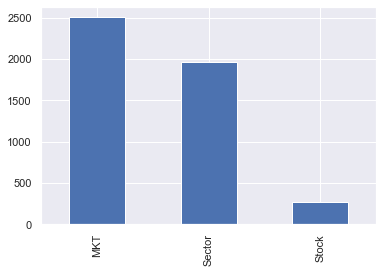

In [27]:
%matplotlib inline
import seaborn as sns
sns.set() #replace default with seaborn
counts = df['Action'].value_counts()
print(counts);
counts.plot(kind='bar'); 

We can see from the bar plot above that give our simple analysis and filtering we would be better of
investing in the market. 
PS: we have not calculated or backtested returns(this project is to show that i can work with data)